# Chapter 3. 그래프와 워드 클라우드 
* [github 주소](https://github.com/wikibook/textmining)

In [39]:
# 예제 파일 다운로드 방법1: 저장소를 복제 
# !git clone https://github.com/wikibook/textmining

In [40]:
# !pip install nltk

## 01. 단어 빈도 그래프 - 많이 쓰인 단어는? 

In [41]:
# 단어 빈도 그래프 
# 먼저, 단어의 빈도를 구함 
# 문서들로부터 각 단어들을 분리 
# 토큰화, 어간 추출, 불용어 처리 등 

import nltk 
nltk.download('gutenberg')

from nltk.corpus import gutenberg 
file_names= gutenberg.fileids()# 파일 제목을 읽어옴 

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [42]:
# gutenberg.open() 
    # 파일 제목(fileid), 해당 파일 열 수 있음 
# .read() 
    # 그 내용을 읽어올 수 있음 
# len()
    # 읽어 온 텍스트의 길이를 알 수 있음 
    # len(문자열) - 문자의 수 

doc_alice= gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used: ', len(doc_alice)) # 사용된 문자의 수 
print('#Text sample: ')
print(doc_alice[:500]) # 앞의 500자만 출력

#Num of characters used:  144395
#Text sample: 
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [43]:
# nltk 이용한 토큰화 
# 토큰 수, 앞 20개의 토큰 확인 
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice) # 토큰화 실행 

print('#Num of tokens used: ', len(tokens_alice))
print('Token sample:')
print(tokens_alice[:20])

#Num of tokens used:  33494
Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [44]:
# 포터 스테머로 스테밍, 토큰 수와 앞 20개의 토큰을 확인 
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

# 모든 토큰에 대해 스테밍 실행 
stem_tokens_alice= [stemmer.stem(token) for token in tokens_alice]

print('#Num of tokens after stemming: ', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming:  33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [45]:
# WordNetLemmatizer를 이용해 표제어를 추출, 토큰 수와 앞 20개의 토큰을 스테밍 결과와 비교 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 모든 토큰에 대해 스테밍 실행 
lem_tokens_alice=  [lemmatizer.lemmatize(token) for token in tokens_alice]

print('#Num of tokens after lemmatizing: ', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatizing:  33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


#Num of tokens with RegexpTokenizer:  21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']

#Num of tokens after stopword elimination:  12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']

#Num of used words:  2687
#Top 20 high frequency words: 
'said': 462,'alice': 385,'little': 128,'one': 98,'know': 88,'like': 85,'went': 83,'would': 78,'could': 77,'thought': 74,'time': 71,'queen': 68,'see': 67,'king': 61,'began': 58,'turtle': 57,"'and": 56,'way': 56,'mock': 56,'quite': 55,

 #Num of used words:  1726
#Top 20 high frequency words: 
'said': 462,'alice': 293,'little': 124,'went': 83,'time': 71,'queen': 66,'began': 58,'way': 56,'turtle': 56,'mock': 55,'thought':

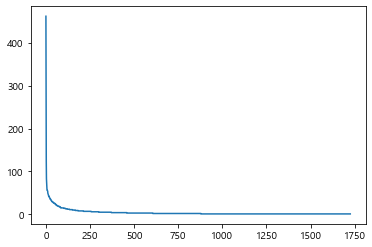

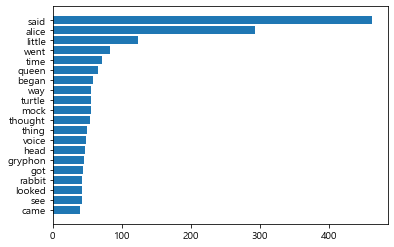

In [46]:
# 정규 표현식을 이용한 토큰화 
# [","] 와 같은 부호 사라지고 , 2자 이하 글자들 제외하여 토큰 수가 줄어듦 
from nltk.tokenize import RegexpTokenizer
tokenizer =RegexpTokenizer("[\w']{3,}") 

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer: ', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])
print()

#----------------------------------------
# 불용어 제거 
from nltk.corpus import stopwords # 일반적으로 분석 대상이 아닌 단어들 
english_stops = set(stopwords.words('english')) # 반복되지 않게 set 으로 변환 

# stopwords 를 제외한 단어들만으로 리스트를 생성 
result_alice= [word for word in reg_tokens_alice if word not in english_stops]

print('#Num of tokens after stopword elimination: ', len(result_alice))
print('#Token sample:')
print(result_alice[:20])
print()

#----------------------------------------
# 단어별로 빈도를 계산 
# 딕셔너리로 단어별 개수를 세고, 빈도가 큰 순으로 정렬 
# dict.get(찾고자 하는 키, 인자에 넣은 키가 업을 때 넣고자 하는 값) 
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1 # word를 찾고 없으면 0 

print('#Num of used words: ', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print('#Top 20 high frequency words: ')
for key in sorted_word_count[:20]: # 빈도수 상위 20개의 단어를 출력 
    print(f'{repr(key)}: {alice_word_count[key]}', end= ',')

#----------------------------------------
# 명사, 동사, 형용사만 추출 
my_tag_set = ['NN','VB','VBD','JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set] 

alice_word_count = dict()
for word in my_words : 
    alice_word_count[word] = alice_word_count.get(word,0) + 1

print()
print('\n','#Num of used words: ', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print('#Top 20 high frequency words: ')
for key in sorted_word_count[:20]: # 빈도수 상위 20개의 단어를 출력 
    print(f'{repr(key)}: {alice_word_count[key]}', end= ',')

#----------------------------------------
# 그래프를 이용한 시각화를 위해 스테밍 생략 
# 시각화 라이브러리 : matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline 

# 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성 
w = [alice_word_count[key] for key in sorted_word_count] # 빈도수 

plt.plot(w)
plt.show()

# 가독성을 위해 그래프도 상위 빈도수 단어에 대해서만 그려야 한다 
# 하지만, 그래프를 통해 : 빈도수에 따라 정렬된 단어의 순위 / 빈도수가 극단적으로 반비례 함을 확인함 
# 쓰는 단어만 주로 씀, 순위 100 넘어가면 매우 적은 빈도수 
# 일부 단어는 : 너무 빈도수 높아, 단어가 미치는 영향이 너무 커지는 결과 발생 

#----------------------------------------
# 지프의 법칙(Zipt's law)
# 말뭉치의 단어들을 사용 빈도가 높은 순서대로 나열하면 - 단어의 사용 빈도는 단어의 순위에 반비례함 (단어 빈도 높을수록 단어 순위 낮음)
# 말뭉치에서 단어 빈도가 상위 몇 개에 집중되어 단어들의 문서의 분류에 영향 받아 -> 해결책 필요 

#----------------------------------------
# 단어 빈도수 막대 그래프 * 수평 
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬 
w = [alice_word_count[key] for key in n] # 20개 단어에 대한 빈도 
plt.barh(range(len(n)), w, tick_label = n ) # 수평 막대 그래프
plt.show()

In [47]:
#----------------------------------------
# Tips: matplotlib, plt.bar, plt.barh 
# 그래프 시각화 패키지 
# 막대 그래프, 꺾은 선 그래프, 히스토그램, 파이차트 

# plt.plot 
    # 꺽은선 그래프, 가장 대표적인 함수 
    # x,y 모두 주거나 , y 값만 주어서 그릴 수 있음 

# plt.bar
    # 막대 그래프를 그릴 수 있는 함수 
    # x,y 값 모두 주어야 하고 tick_label 통해 막대의 이름을 지정해줄 수 있음 

# plt.barh 
    # 일반적인 수직 막대 그래프와 달리 수평 막대 그래프를 그리는 데 씀 

## 02. 워드 클라우드로 내용을 한눈에 보기 
* 워드 클라우드 
    * 빈도가 높은 단어는 크게, 낮은 단어는 작게 보여줌
    * 한눈에 전체적인 현황 파악 
    * 패키지: WordCloud 

* WordCloud 
    * 객체 만들어 generate() 호출 
    * generate()의 인수로 분석하고자 하는 텍스트를 넘겨주면 됨
    * generage(문서): 자동으로 토큰화 등의 작업 함 
    * generate_from_frequencies() : 토큰화, 정규화 진행한 내용을 가져올 경우, 계산된 빈도 사용해 워드 클라우드 그림 
    * max_font_size로 최대 폰트 사이즈 제한 가능: 빈도수 낮고 높은 단어의 차이가 클 경우
    * mask 매개변수에 할당 :이미지 위에 워드 클라우드 출력

In [48]:
# !pip install wordcloud

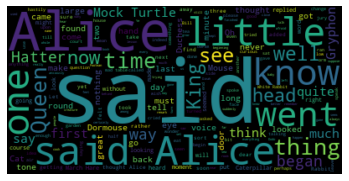

(200, 400, 3)

In [49]:
#----------------------------------------
# * WordCloud 
#     * 객체 만들어 generate() 호출 
#     * generate()의 인수로 분석하고자 하는 텍스트를 넘겨주면 됨
#     * generage(문서): 자동으로 토큰화 등의 작업 함 
#     * generate_from_frequencies() : 토큰화, 정규화 진행한 내용을 가져올 경우, 계산된 빈도 사용해 워드 클라우드 그림 
#     * max_font_size로 최대 폰트 사이즈 제한 가능: 빈도수 낮고 높은 단어의 차이가 클 경우 
#     * mask 매개변수에 할당 :이미지 위에 워드 클라우드 출력
#----------------------------------------
# plt.imshow() 
    # 이미지 출력에 쓰임, 이미지 읽어와서 출력, 프로그램에서 만든 이미지 출력할 수 있음 
    # 넘파이 행렬로 된 데이터를 이미지 형태로 출력할 수 있음 

from wordcloud import WordCloud 

# 워드 클라우드 이미지 생성 
wordcloud = WordCloud().generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear') # 이미지를 출력 
plt.show()

wordcloud.to_array().shape

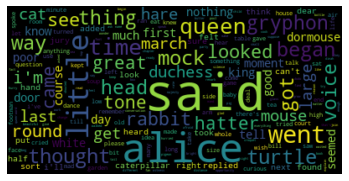

In [50]:
wordcloud = WordCloud(max_font_size= 60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

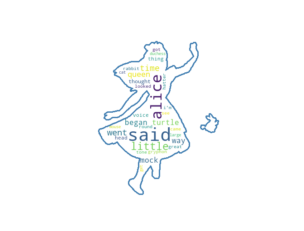

In [51]:
# 이미지 위에 워드 클라우드 출력 
import numpy as np 
from PIL import Image 

# 배경 이미지를 불러와서 넘파이 array 로 변환 
alice_mask = np.array(Image.open('alice_mask.png'))

wc = WordCloud(background_color ='white', # 배경색 지정 
              max_words = 30, # 출력한 최대 단어 수 
              mask = alice_mask, # 배경으로 사용할 이미지 
              contour_width = 3, # 테두리 굵기 
              contour_color = 'steelblue' # 테두리 색 
              )

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성 

wc.to_file('alice.png') # 결과를 이미지 파일로 저장 

# 화면에 결과를 출력
plt.figure()
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

## 03. 한국어 문서에 대한 그래프와 워드 클라우드

In [52]:
# !pip install konlpy

In [53]:
# KoNLPy 를 통해 헌법 텍스트 가져옴 
# 타입과, 문자 수 앞 일부분 등을 확인 

from konlpy.corpus import kolaw 
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) # 가져온 데이터의 type을 확인 
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [54]:
from konlpy.tag import Okt 
t = Okt()
tokens_const = t.morphs(const_doc) # 형태소 단위로 tokenize 

print('#토큰의 수 :', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

# \n\n,3,1,와,에,은 등 의미가 없어 보이는 형태소 다소 포함 
# 보통 wordcloud는 명사만 주로 가져옴 

#토큰의 수 : 8796
#앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [55]:
# wordcloud- noun 만 가져옴 
# method 1 
word = [word for word, tag in t.pos(const_doc) if tag in 'Noun']
print('#토큰의 수: ', len(tokens_const))
print('#앞 100개의 토큰')
print(word[:100])
# method 2
tokens_const = t.nouns(const_doc) # 형태소 단위로 tokenize 후 명사만 추출 
print('#토큰의 수: ', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100]) 

# But, 애,것,함,제,장과 같은 1자로 된 명사는 의미 부여가 어려움 

#토큰의 수:  8796
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']
#토큰의 수:  3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로',

In [56]:
# 애,것,함,제,장과 같은 1자로 된 명사 제거 
tokens_const= [token for token in tokens_const if len(token) > 1]
print('#토큰의 수 : ',len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100]) 

#토큰의 수 :  3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


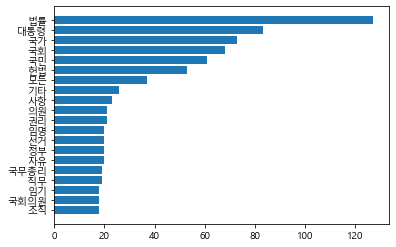

In [57]:
# 불용어 사전 만들고 코드에서 제거 
# wordcloud - 수평 막대 그래프 
# 한글 폰트 지정, 함수화 통해 font_name = 'AppleGothic'을 할당 

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt 

font_name= font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgunsl.ttf').get_name()
# 맥인 경우 아래와 같이 font_name 지정 
# font_name = 'AppleGothic'
rc('font', family = font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1 

def word_graph(cnt, max_words= 10):

    sorted_w = sorted(cnt.items(), key = lambda kv: kv[1]) # dict_items([('대한민국', 11), ('헌법', 53), ('유구', 1), , key value(빈도수) 기준으로 sort (오름차순)
    print(sorted_w[-max_words:]) # [('조직', 18),('국무총리', 19),('자유', 20), ~ ('법률', 127)]
    n,w = zip(*sorted_w[-max_words:]) # n = 조직, 국무총리, ~ w= 18, 19, ~ 

    plt.barh(range(len(n)), w, tick_label = n )
    # plt.savefig('bar.png') # 필요한 경우, 그래프를 이미지 파일로 저장함 
    plt.show()

word_graph(const_cnt, max_words= 20)

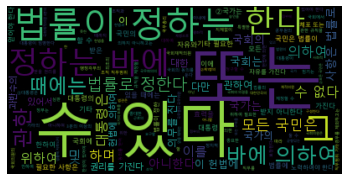

In [58]:
# wordcloud
# wordcloud 객체, 별도로 폰트 사용 - 한글 폰트 지정해서 객체를 생성
# generte() 메서드 이용해, 사용한 형태소 분석 결과 원문 대신 넣고 결과 show 

font_path = 'c://Windows/FOnts/malgun.ttf'
wordcloud = WordCloud(font_path = font_path).generate(const_doc)

plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

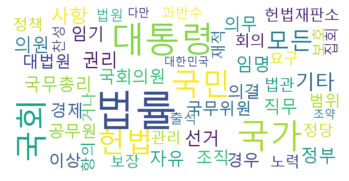

In [61]:
# 또는 , 수 있다, 관한, 때에는 - 제거 해야 함 
# generate_from_frequencies() + 형태소 분석 결과에 대한 빈도 딕셔너리(const_cnt) 로 워드 클라우드 생성
# WordCloud() 객체, 인수 조정, 이미지 세밀 조정 가능 

# max_font_size 
# width, height = 이미지의 너비, 높이 
# background_color = 배경색 
# plt.imshow()  = 주피터 노트북에 출력하는 이미지는 WordCloud 가 생성하는 이미지를 다시 재처리해 보여줌 , 지정한 크기 반영 X 
# to_file() 메서드 =  이미지 저장할 수 있음 

wordcloud = WordCloud(
    font_path = font_path, 
    max_font_size = 100, 
    width = 800, # 이미지 너비 지정 
    height = 400, # 이미지 높이 지정 
    background_color= 'white', # 이미지 배경색 지정 
    max_words= 50
)

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드를 생성
wordcloud.generate_from_frequencies(const_cnt)

wordcloud.to_file('const.png') # 생성된 이미지를 파일로 저장 

plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()